In [17]:
import librosa, IPython
import librosa.display
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import numpy as np

In [4]:
file = './Data/genres_original/classical/classical.00005.wav'
Signal , sr = librosa.load(songname , sr = 22050)

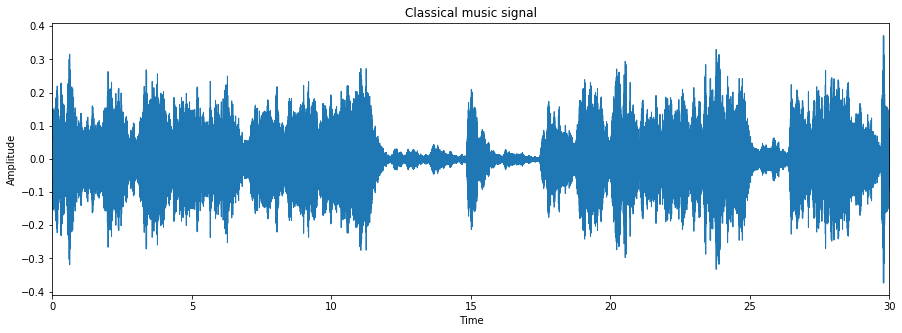

In [5]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(Signal , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Classical music signal")
plt.show()

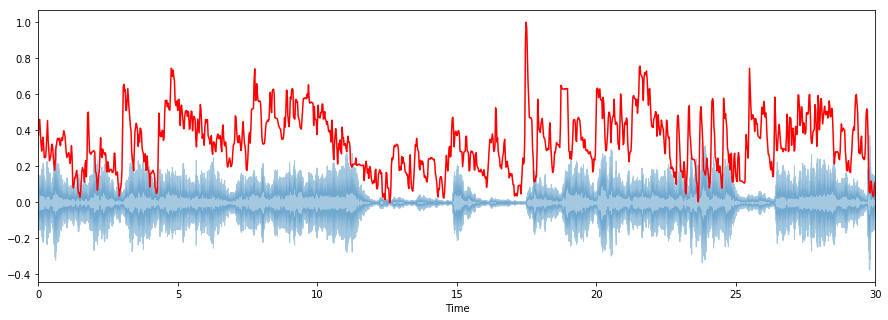

In [10]:
'''
Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. 
To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.
'''
#Defining the spectral rolloff for librosa
spectral_rolloff = librosa.feature.spectral_rolloff(Signal+0.01, sr=sr)[0] 

# Normalising the spectral rolloff for visualisation
def normalize(Signal, axis=0):
    return sklearn.preprocessing.minmax_scale(Signal, axis=axis)

# Computing the time variable for visualization
plt.figure(figsize=(15, 5))
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

#Plotting the Spectral Rolloff along the waveform
librosa.display.waveplot(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

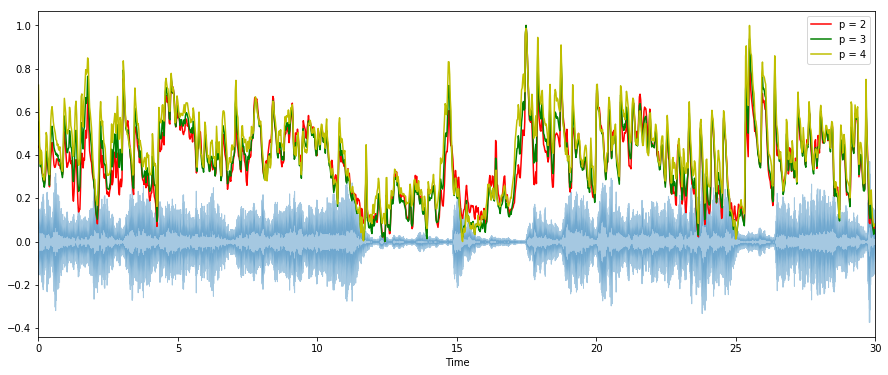

In [11]:
'''
Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the
peak maximum (or full width at half maximum [FWHM]) 
'''

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(Signal+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(Signal+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(Signal+0.01, sr=sr, p=4)[0]

#plotting spectral_bandwidth
plt.figure(figsize=(15, 6))
librosa.display.waveplot(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

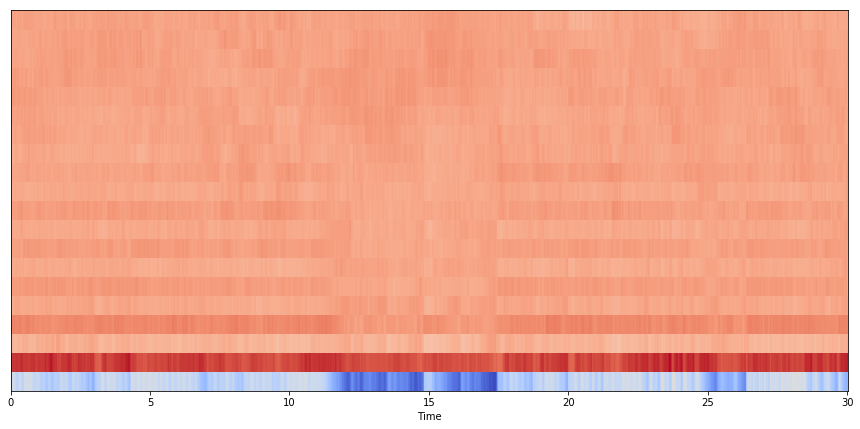

In [12]:
'''
Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) 
that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.
'''

mfccs = librosa.feature.mfcc(Signal, sr=sr)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

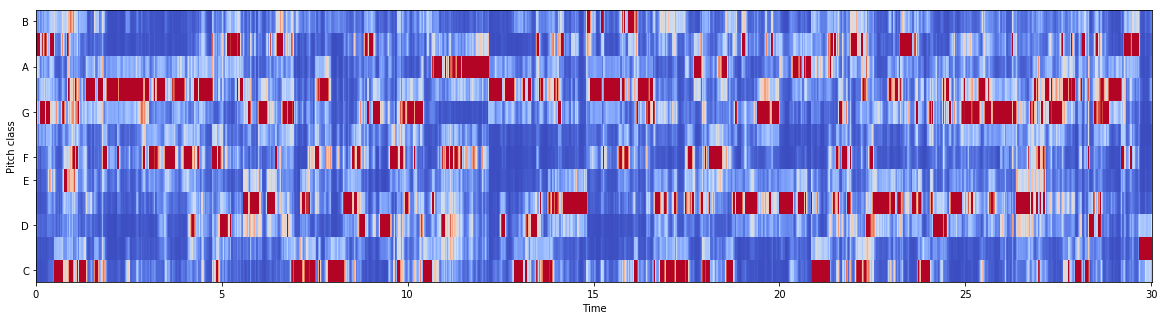

In [13]:
'''
Chroma feature
A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class
 {C, C#, D, D#, E, …, B}, is present in the signal.
In short, It provides a robust way to describe a similarity measure between music pieces.
'''

hop_length = 512
chromagram = librosa.feature.chroma_stft(Signal, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [22]:
#Creating a Dataset

header = 'filename chroma_stft mfcc1 spectral_bandwidth rolloff'
header += ' label'
header = header.split()

In [23]:
#Calculating the features
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./Data/genres_original/{g}'):
        songname = f'./Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        mfcc1 = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(mfcc1)}'    
        
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

PermissionError: [Errno 13] Permission denied: 'data.csv'